# Pandas y Valores Faltandes




## Extra: Tripulación del Titanic

Si llegaste hasta acá y todavía tenés tiempo y ganas, te proponemos que explores el dataset de Supervivientes del Titanic. Queremos saber si los sobrevivientes del RMS Titanic murieron *al azar* o si los sobrevivientes tenían alguna característica distinta de las víctimas de la tragedia. Tenemos disponibles algunos datos sobre pasajeros/as del Titanic, que pueden descargar [acá](https://www.kaggle.com/c/titanic/) (solo el archivo `train.csv`). La propuesta es analizarlos para intentar encontrar algunas características que separen a los/as pasajeros/as que sobrevivieron de los/as que no.

### Análisis Exploratorio de Datos

1. Cargar los datos desde el archivo csv.
1. Investigar qué forma tienen los datos utilizando las funciones exploratorias que aprendimos. ¿Qué información tenemos en los datos?¿Qué representa cada columna?¿Cuántos pasajeros/as están incluidos/as en este Dataset?
1. ¿Faltan datos? ¿Se te ocurre por qué? ¿Qué harías con ellos?
1. ¿Te parece que todas las columnas son informativas o borrarías alguna?

**Para pensar**: ¿te parece que la supervivencia (o no) fue un proceso completamente *al azar* o existe algún mecanismo generador de estos datos?¿Qué nos enseñó la famosa película de David Cameron?

https://medium.com/@diolmedo/participando-en-la-competencia-titanic-machine-learning-from-disaster-en-la-plataforma-kaggle-47f01c838af2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
titanic = pd.read_csv('src/Titanic.csv',delimiter = ',',encoding = "utf-8")
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


2. ¿Cuántas columnas (features) tiene?¿Cuáles son sus nombres?¿Y cuántas filas (instancias)?.

In [3]:
print(titanic.shape)
print(titanic.columns)
# wine_reviews.drop(columns=['Unnamed: 0'], inplace = True)
# titanic.drop(columns=['Parch'], inplace = False)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


3. ¿Cuántos valores faltantes hay en cada columna?

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(titanic.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


4. ¿Cuál o cuáles son las columnas con más valores faltantes?

In [6]:
titanic.isna().sum(axis = 0).idxmax()

'Cabin'

In [7]:
titanic.iloc[titanic.isna().sum(axis = 1).idxmax()]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

5. Hacerse alguna pregunta acerca del dataset e intentar responderla. Por ejemplo, ¿cuál es la persona de más edad?

In [8]:
titanic.loc[titanic.Age.idxmax()]

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                            80.0
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                           30.0
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object

In [9]:
titanic.loc[titanic.Age.idxmax()]['Name']

'Barkworth, Mr. Algernon Henry Wilson'

In [10]:
titanic.loc[titanic.Age.idxmin()]

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object

In [11]:
titanic.loc[titanic.Age.idxmin()]['Name']

'Thomas, Master. Assad Alexander'

## Trabajando con datos faltantes

Antes de realizar cada una de las siguientes consignas, recordá copiar el dataset en una nueva variable, así mantemos el dataset original sin modificar.

1. Descartar aquellas filas que tengan algún valor faltante. ¿Cuántas instancias quedan en el dataset?

In [12]:
titanic_copia = titanic.copy()

In [13]:
titanic.shape

(891, 12)

In [14]:
titanic_copia.dropna(inplace = True)
titanic_copia.shape

(183, 12)

2. Descartar aquellas columnas que tengan algún valor faltante. ¿Cuántos y cuáles atributos quedaron?

In [15]:
titanic_copia = titanic.copy()

In [16]:
titanic_copia.shape

(891, 12)

In [17]:
titanic_copia.dropna(axis = 1, inplace = True)
titanic_copia.shape

(891, 9)

In [18]:
titanic_copia.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


Pueden observar que descartar sin ningún criterio puede hacer que perdamos muchos datos.

Tratemos de mejorar un poco los criterios con los que descartamos.

3. Descartar aquellas filas que tengan más de tres valores faltantes. ¿Cuántas instancias quedaron?

In [19]:
titanic_copia = titanic.copy()

In [20]:
titanic_copia.shape

(891, 12)

In [21]:
titanic_copia.dropna(inplace = True, thresh=1)
titanic_copia.shape

(891, 12)

4. Descartar aquellas columnas que tengan más del 50% de valores faltantes. ¿Cuántos y cuáles atributos quedaron? Luego, descartar las instancias que tengan algún valor faltante.

In [22]:
titanic_copia = titanic.copy()

In [23]:
titanic_copia.dropna(axis = 1, inplace = True, thresh=titanic_copia.shape[0]*0.5)
titanic_copia.shape

(891, 11)

In [24]:
titanic_copia.dropna(inplace = True)
titanic_copia.shape

(712, 11)

In [25]:
titanic_copia.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Imputación de Valores Faltantes

1. Calcular el valor medio, moda, mediana y la desviación estándar de la columna `age`.

In [26]:
print(titanic.Age.mean())
print(titanic.Age.mode()[0])
print(titanic.Age.median())
print(titanic.Age.std())

29.69911764705882
24.0
28.0
14.526497332334042


2. Imputar los valores faltantes en la columna `Age` usando su valor medio.

In [27]:
titanic_copia = titanic.copy()
titanic_copia.fillna(titanic.Age.median(), inplace = True)

3. ¿Cambió el valor medio de la columna?¿Y su desviación estándar?¿Y los otros estadísticos que calculamos?¿Por qué?

In [28]:
print(titanic_copia.Age.mean())
print(titanic_copia.Age.mode()[0])
print(titanic_copia.Age.median())
print(titanic_copia.Age.std())

29.36158249158249
28.0
28.0
13.019696550973201


4. Volver a correr las celdas anteriores, pero completando los valores faltantes con la mediana y luego la moda.

5. Trabajar con un dataset sin visualizar es muy aburrido y, diríamos, casi frustrante. La próxima clase ya nos meteremos de lleno en visualización. Mientras tanto, intenten hacer un histograma de los puntajes asignados y, luego, de los precios.

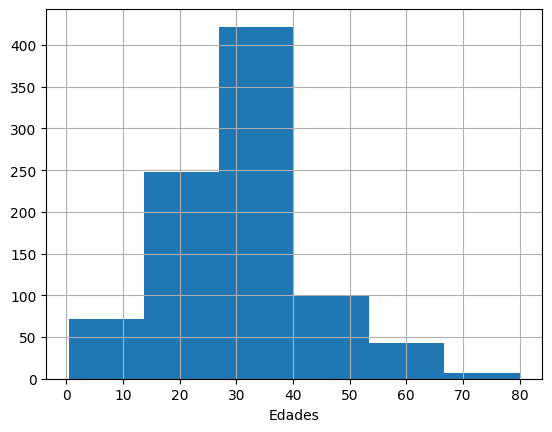

In [29]:
plt.hist(titanic_copia.Age, bins= 6)
plt.xlabel('Edades')
plt.grid()
plt.show()

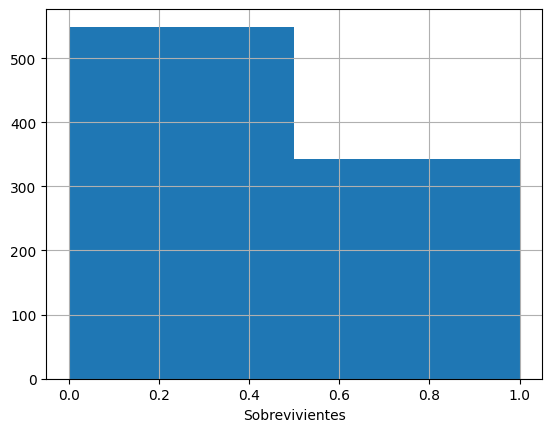

In [30]:
plt.hist(titanic_copia.Survived, bins= 2)#, log = True)
plt.xlabel('Sobrevivientes')
plt.grid()
plt.show()

Respecto al segundo gráfico, ¿les gusta cómo queda?¿Qué es una escala logarítmica?

In [31]:
print(titanic[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False))

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


In [32]:
print(titanic[['Age','Survived']].groupby(['Age']).mean().sort_values(by='Survived', ascending=False))

       Survived
Age            
0.42        1.0
5.00        1.0
63.00       1.0
53.00       1.0
0.67        1.0
...         ...
28.50       0.0
36.50       0.0
34.50       0.0
20.50       0.0
23.50       0.0

[88 rows x 1 columns]


In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
titanic.fillna(titanic.Age.mean(), inplace = True)

In [35]:
titanic['Rango_Edad'] = pd.cut(titanic['Age'], 5)

In [36]:
print(titanic[['Rango_Edad','Survived']].groupby(['Rango_Edad']).mean().sort_values(by='Survived', ascending=False))

                  Survived
Rango_Edad                
(0.34, 16.336]    0.550000
(48.168, 64.084]  0.434783
(32.252, 48.168]  0.404255
(16.336, 32.252]  0.344168
(64.084, 80.0]    0.090909


In [37]:
print(titanic[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False))

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


In [38]:
print(titanic[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False))

        Survived
Sex             
female  0.742038
male    0.188908


In [39]:
print(titanic[['Cabin','Survived']].groupby(['Cabin']).mean().sort_values(by='Survived', ascending=False))

         Survived
Cabin            
C62 C64       1.0
C126          1.0
C50           1.0
D7            1.0
C47           1.0
...           ...
C118          0.0
C111          0.0
C110          0.0
B94           0.0
T             0.0

[148 rows x 1 columns]


In [40]:
print(titanic[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False))

                   Survived
Embarked                   
29.69911764705882  1.000000
C                  0.553571
Q                  0.389610
S                  0.336957


In [41]:
titanic.fillna(titanic.Embarked.mode(), inplace = True)

In [42]:
print(titanic[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False))

       Survived
SibSp          
1      0.535885
2      0.464286
0      0.345395
3      0.250000
4      0.166667
5      0.000000
8      0.000000


In [43]:
print(titanic[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False))

       Survived
Parch          
3      0.600000
1      0.550847
2      0.500000
0      0.343658
5      0.200000
4      0.000000
6      0.000000


In [44]:
print(titanic[['Parch','Survived']].groupby(['Parch']).count().sort_values(by='Survived', ascending=False))

       Survived
Parch          
0           678
1           118
2            80
3             5
5             5
4             4
6             1


In [45]:
print(titanic[['Sex','Pclass','Survived']].groupby(['Sex','Pclass']).mean().sort_values(by='Survived', ascending=False))

               Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447


In [46]:
print(titanic[['Sex','Rango_Edad','Survived']].groupby(['Sex','Rango_Edad']).mean().sort_values(by='Survived', ascending=False))

                         Survived
Sex    Rango_Edad                
female (48.168, 64.084]  0.916667
       (32.252, 48.168]  0.794118
       (16.336, 32.252]  0.716763
       (0.34, 16.336]    0.673469
male   (0.34, 16.336]    0.431373
       (32.252, 48.168]  0.183333
       (48.168, 64.084]  0.177778
       (16.336, 32.252]  0.160000
       (64.084, 80.0]    0.090909
female (64.084, 80.0]         NaN


In [47]:
print(titanic[['Pclass','Rango_Edad','Survived']].groupby(['Pclass','Rango_Edad']).mean().sort_values(by='Survived', ascending=False))

                         Survived
Pclass Rango_Edad                
2      (0.34, 16.336]    0.904762
1      (0.34, 16.336]    0.888889
       (32.252, 48.168]  0.681159
       (16.336, 32.252]  0.640449
       (48.168, 64.084]  0.534884
2      (32.252, 48.168]  0.448980
       (16.336, 32.252]  0.421053
3      (0.34, 16.336]    0.400000
2      (48.168, 64.084]  0.352941
3      (16.336, 32.252]  0.244838
1      (64.084, 80.0]    0.166667
3      (48.168, 64.084]  0.111111
       (32.252, 48.168]  0.100000
2      (64.084, 80.0]    0.000000
3      (64.084, 80.0]    0.000000


In [48]:
print(titanic[['Sex','Pclass','Rango_Edad','Survived']].groupby(['Sex','Pclass','Rango_Edad']).mean().sort_values(by='Survived', ascending=False))

                                Survived
Sex    Pclass Rango_Edad                
female 1      (32.252, 48.168]  1.000000
       2      (0.34, 16.336]    1.000000
       3      (48.168, 64.084]  1.000000
male   1      (0.34, 16.336]    1.000000
female 1      (16.336, 32.252]  0.975610
              (48.168, 64.084]  0.941176
       2      (16.336, 32.252]  0.921053
              (32.252, 48.168]  0.909091
       1      (0.34, 16.336]    0.833333
       2      (48.168, 64.084]  0.833333
male   2      (0.34, 16.336]    0.818182
female 3      (0.34, 16.336]    0.545455
              (16.336, 32.252]  0.521277
male   1      (32.252, 48.168]  0.435897
              (16.336, 32.252]  0.354167
       3      (0.34, 16.336]    0.270270
       1      (48.168, 64.084]  0.269231
female 3      (32.252, 48.168]  0.250000
male   1      (64.084, 80.0]    0.166667
       3      (16.336, 32.252]  0.138776
       2      (48.168, 64.084]  0.090909
              (16.336, 32.252]  0.087719
              (3

In [49]:
print(titanic[['Sex','Pclass','Rango_Edad','Survived']].groupby(['Sex','Pclass','Rango_Edad']).count().sort_values(by='Survived', ascending=False))

                                Survived
Sex    Pclass Rango_Edad                
male   3      (16.336, 32.252]       245
female 3      (16.336, 32.252]        94
male   2      (16.336, 32.252]        57
       3      (32.252, 48.168]        54
       1      (16.336, 32.252]        48
female 1      (16.336, 32.252]        41
male   1      (32.252, 48.168]        39
female 2      (16.336, 32.252]        38
male   3      (0.34, 16.336]          37
female 3      (0.34, 16.336]          33
       1      (32.252, 48.168]        30
male   2      (32.252, 48.168]        27
       1      (48.168, 64.084]        26
female 2      (32.252, 48.168]        22
       1      (48.168, 64.084]        17
       3      (32.252, 48.168]        16
male   2      (48.168, 64.084]        11
              (0.34, 16.336]          11
female 2      (0.34, 16.336]          10
male   3      (48.168, 64.084]         8
female 2      (48.168, 64.084]         6
male   1      (64.084, 80.0]           6
female 1      (0